# Data Preparation

Let's get a look on our Pokémons. The function below will plot all the sprites of a specific Pokémon on screen. That way we can have an idea of what kind of problem we can find in out sprite dataset.

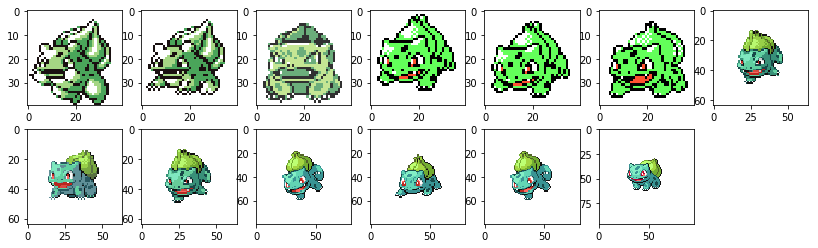

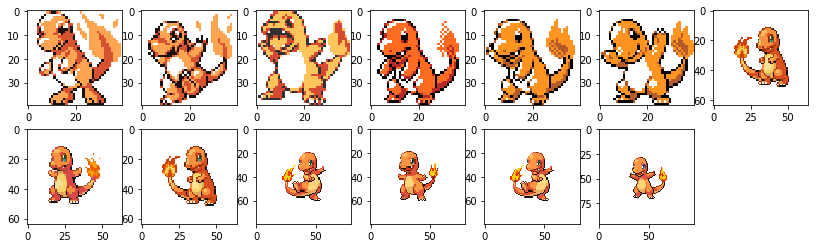

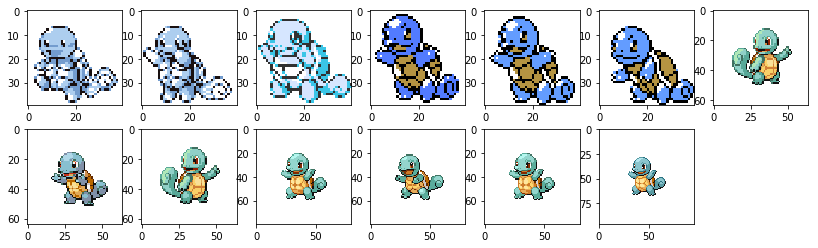

In [1]:
%matplotlib inline
from utility.plot import plot_all

#Plotting Bulbassaur ID = 1
plot_all(1)

#Plotting Charmander ID = 4
plot_all(4)

#Plotting Squirtle ID = 7
plot_all(7)

Now let's take a look at the sprites of an Evolutionary Chain.

Plotting the evolutionary chain of Bulbasaur (Bulbasaur -> Ivysaur -> Venusaur) from the fifth generation games let's us see a problem with out dataset: Centering and cropping of images.

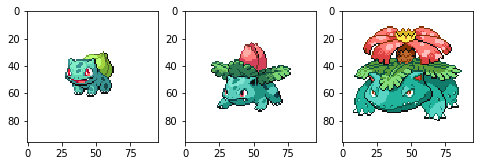

In [2]:
%matplotlib inline
from utility.plot import plot_chain

plot_chain("gen05_black-white",[1,2,3])

On this step, we will build and test our pre-processing pipeline. Its goal is to identify the main object in the image (A simple task in out sprite dataset), find out its bounding box and redimensionate the image to an adequate size (We will use a 64 x 64 pixels image on this article)

This routine will be tested on Bulbasaur, Charmander, Squirtle and Venusaur sprites from the fifth generation.

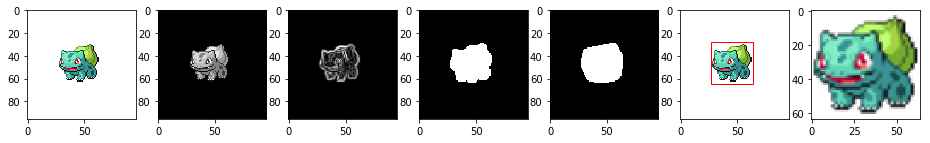

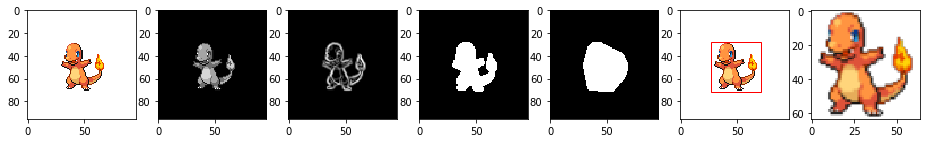

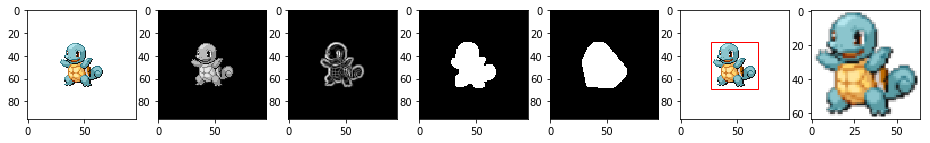

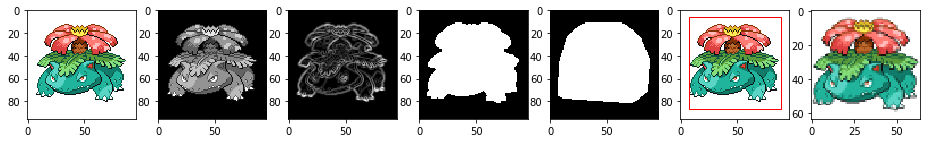

In [7]:
%matplotlib inline
from utility.preprocessing import center_and_resize
import matplotlib.image as mpimg
import os

main_folder = "./sprites/pokemon/main-sprites/"
game_folder = "gen05_black-white"
pkm_list = [1, 4, 7, 3]

for pkm in pkm_list:
    img_file = "{id}.png".format(id=pkm)
    img_path = os.path.join(main_folder,game_folder,img_file)
    img = mpimg.imread(img_path)
    center_and_resize(img,plot=True,id=img_path)

Finnaly, let's call our centering pipeine on all sprites of a generation. To ensure the process is going smoothly, one in each thirty sprites will be ploted for visual inspection.

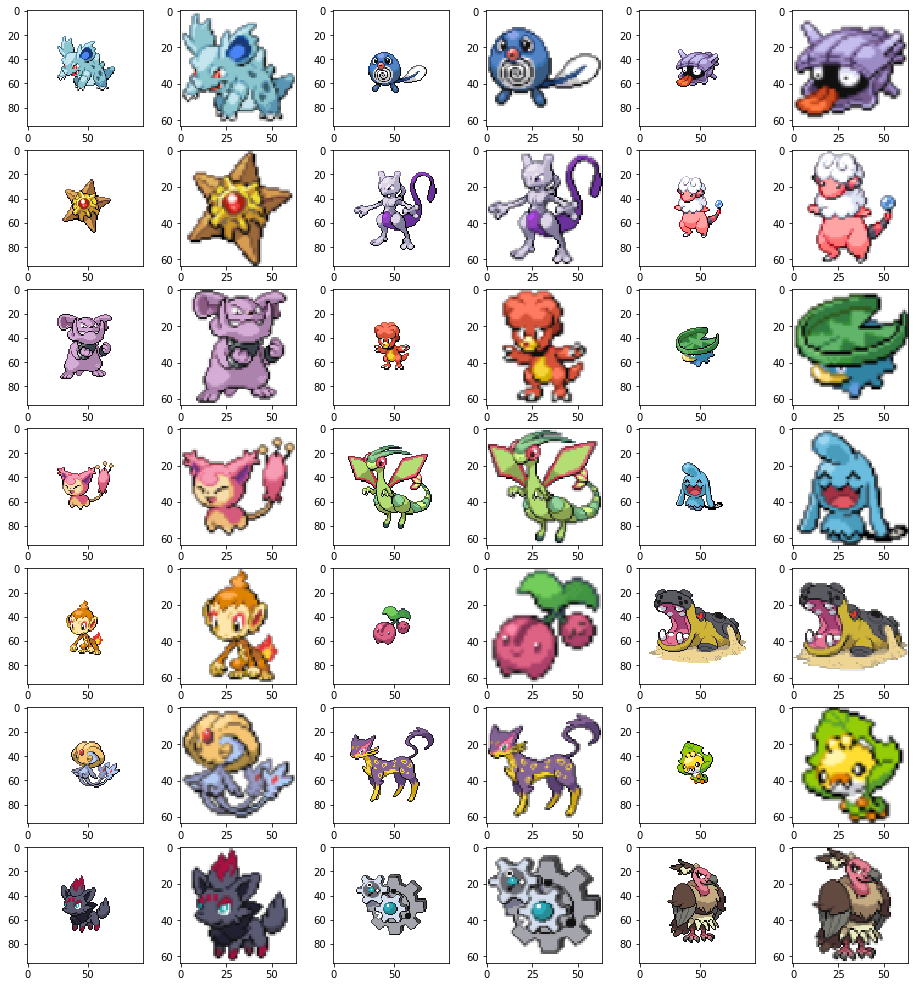

In [4]:
%matplotlib inline
from utility.preprocessing import center_and_resize
import matplotlib.image as mpimg
from math import ceil
import matplotlib.pyplot as plt

main_folder = "./sprites/pokemon/main-sprites/"
game_folder = "gen05_black-white"
pkm_list = range(1,650)

image_list = []
for pkm in pkm_list:
    try:        
        image_file = "{id}.png".format(id=pkm)
        image_path = os.path.join(main_folder,game_folder,image_file)
        image = mpimg.imread(image_path)
        image_resize = center_and_resize(image,plot=False,id=image_path)
        plot = (pkm % 30 == 0)
        if plot:
            image_list.append((image,image_resize))
    except ValueError as e:
        print("Out of Bounds Error:", e)
        
n_cols = 6
n_rows = ceil(2*len(image_list)/n_cols)
plt.figure(figsize=(16,256))
for idx, image_pair in enumerate(image_list):
    image, image_resize = image_pair
    plt.subplot(100,6,2*idx+1)
    plt.imshow(image)
    plt.subplot(100,6,2*idx+2)
    plt.imshow(image_resize)        

At least, let's process all the images and save them to disk for further use.

In [5]:
import warnings
import os
import matplotlib.image as img
from skimage import io
from utility.preprocessing import center_and_resize

main_folder = "./sprites/pokemon/main-sprites/"
dest_folder = "./sprites/pokemon/centered-sprites/"

if not os.path.exists(dest_folder):
    os.makedirs(dest_folder)

gen_folders = {    
    "gen01_red-blue" : 151,
    "gen01_red-green" : 151,
    "gen01_yellow" : 151,
    "gen02_crystal" : 251,
    "gen02_gold" : 251,
    "gen02_silver" : 251,
    "gen03_emerald" : 386,
    "gen03_firered-leafgreen" : 151,
    "gen03_ruby-sapphire" : 386,
    "gen04_diamond-pearl" : 493,
    "gen04_heartgold-soulsilver" : 386,
    "gen04_platinum" : 386,
    "gen05_black-white" : 649
}

for gen, max_pkm in gen_folders.items():
    print("Starting",gen)
    main_gen_folder = os.path.join(main_folder,gen)
    dest_gen_folder = os.path.join(dest_folder,gen)
    if not os.path.exists(dest_gen_folder):
        os.makedirs(dest_gen_folder)
    for pkm_id in range(1,max_pkm+1):
        image_file = "{id}.png".format(id=pkm_id)
        image_path = os.path.join(main_gen_folder,image_file)        
        try:
            image = mpimg.imread(image_path)
            new_image = center_and_resize(image,plot=False,id=image_path)
            new_image_path = os.path.join(dest_gen_folder,image_file)
            with warnings.catch_warnings():
                warnings.simplefilter("ignore")
                io.imsave(new_image_path,new_image)
        except FileNotFoundError:
            print(" - {file} not found".format(file=image_path))
print("Finished")
    

Starting gen03_emerald
Starting gen01_yellow
Starting gen05_black-white
Starting gen04_platinum
Starting gen02_crystal
Starting gen04_heartgold-soulsilver
Starting gen01_red-green
Starting gen01_red-blue
Starting gen02_silver
Starting gen03_firered-leafgreen
Starting gen03_ruby-sapphire
Starting gen04_diamond-pearl
Starting gen02_gold
Finished
